## **DATASET UPLOADING:-**

In [2]:
from google.colab import files
uploaded=files.upload()

Saving cricket clean.csv to cricket clean.csv


## **REQUIRED LIBRARIES:-**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## **READING OF DATASET:**

In [37]:
df=pd.read_csv('cricket clean.csv')
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


Player 👤 → The name of the player.

Mat 🏏 → Total number of matches played by the player.

Inns 🎯 → Total number of innings the player has batted in.

NO (Not Outs) 🚫 → Number of times the player remained not out at the end of an innings.

Runs 🏃‍♂️ → Total runs scored by the player in their career.

HS (Highest Score) 🔝 → The player’s highest individual score in a single innings.

Ave (Batting Average) 📊 → The batting average, calculated as total runs divided by number of times out. Ave = Runs / (Inns - NO)

BF (Balls Faced) 🎾 → Total number of balls faced by the player while batting.

SR (Strike Rate) ⚡ → The strike rate, showing how quickly the player scores. SR = (Runs / BF) * 100

100 (Centuries) 💯 → Number of times the player scored 100 or more runs in an innings.

50 (Half-Centuries) 🟡 → Number of times the player scored between 50 and 99 runs in an innings.

0 (Ducks) 🦆 → Number of times the player got out without scoring any runs.

Exp (Experience) ⏳ → The experience level of the player, which can be based on matches played, years active, or any predefined value representing seniority.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Mat     79 non-null     int64  
 2   Inns    79 non-null     int64  
 3   NO      79 non-null     int64  
 4   Runs    79 non-null     int64  
 5   HS      79 non-null     int64  
 6   Ave     79 non-null     float64
 7   BF      79 non-null     int64  
 8   SR      79 non-null     float64
 9   100     79 non-null     int64  
 10  50      79 non-null     int64  
 11  0       79 non-null     int64  
 12  exp     79 non-null     int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 8.2+ KB


In [7]:
df['HS']=df['HS'].str.replace('*',"")

In [8]:
df['HS']=df['HS'].astype(int)

## **EDA OPERATIONS:-**

In [10]:
#CHECKING FOR DUPLICATE VALUES:-
df.duplicated().sum()

np.int64(0)

In [11]:
#CHECKING FOR NULL VALUES:-
df.isnull().sum()

,0
Player,0
Mat,0
Inns,0
NO,0
Runs,0
HS,0
Ave,0
BF,0
SR,0
100,0


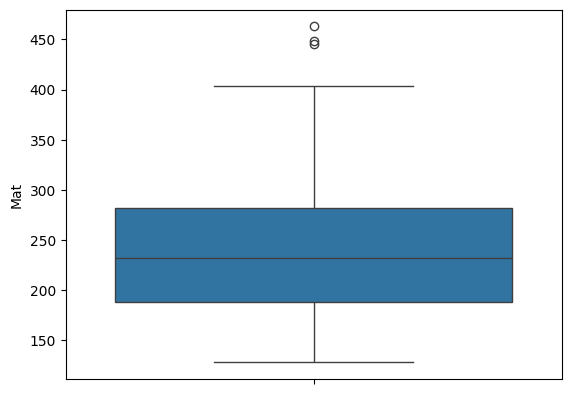

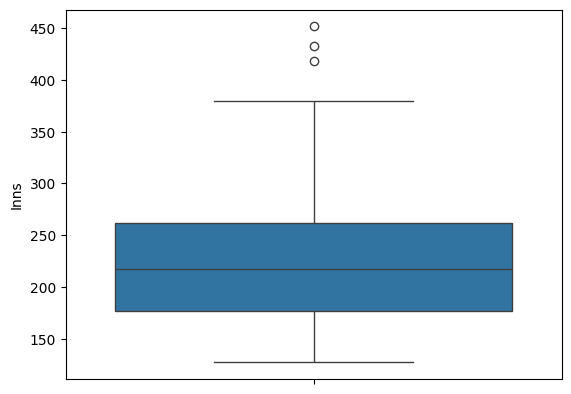

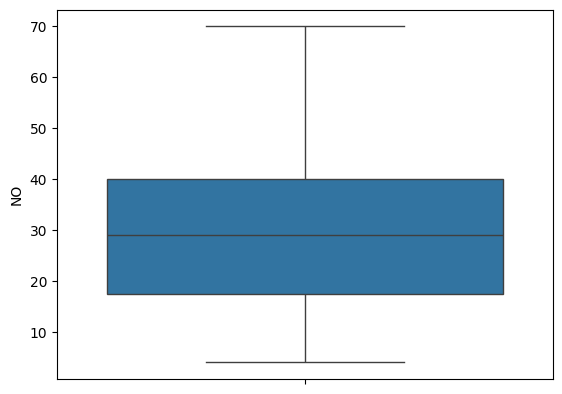

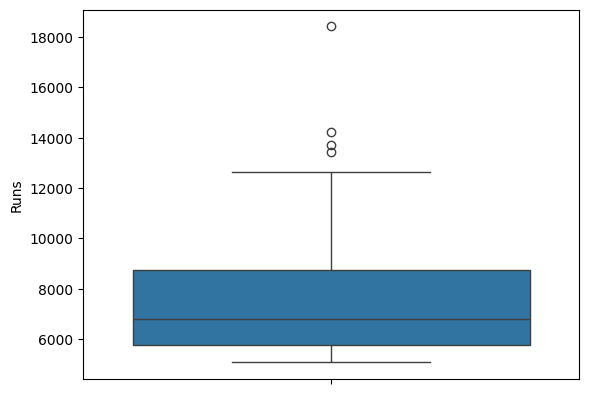

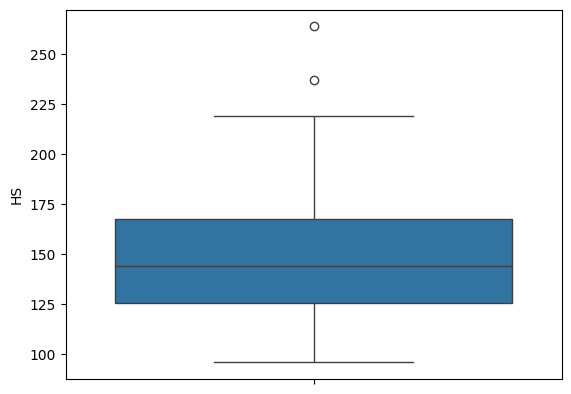

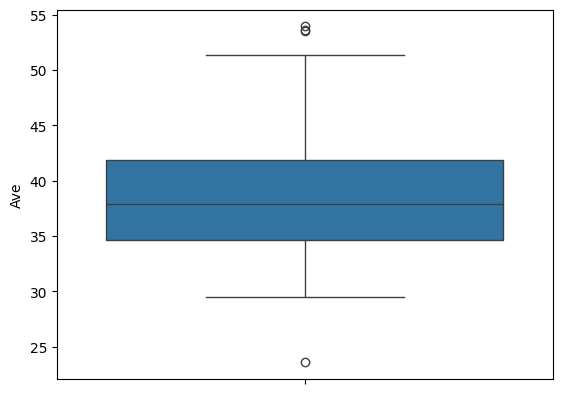

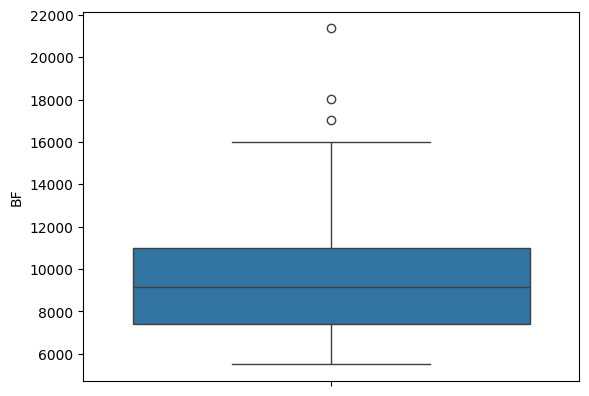

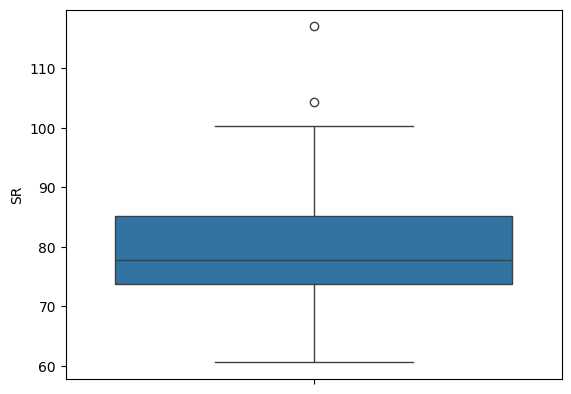

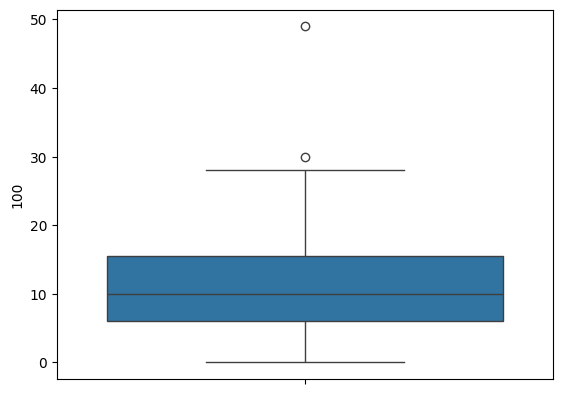

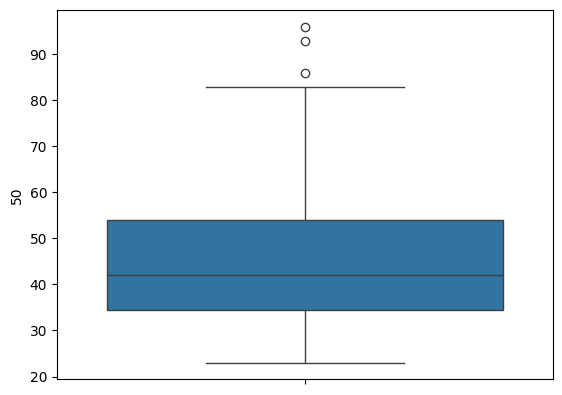

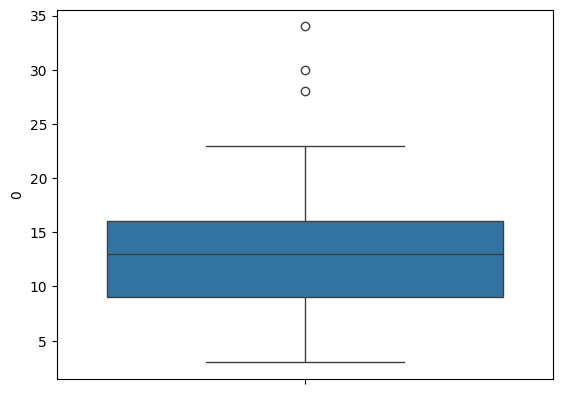

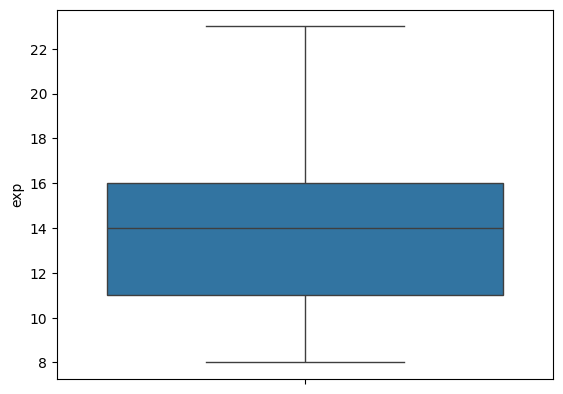

In [12]:
##checking for outliers;-
for i in df.columns:
  if df[i].dtype!='object':
    sns.boxplot(df[i])
    plt.show()

## HERE WE WONT REMOVE OUTLIERS BECAUSE AS ITS THE TRAINING OF UNSUPERVISED LEARNING SO WE NEED DIFFERENT TYPES OF DATA ELEMENTS.

In [14]:
df=df.drop(columns='Player')

In [15]:
#STANDERDIZATION PROCESS:-
se=StandardScaler()
df_scaled=se.fit_transform(df)

In [16]:
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)
df_scaled.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,exp
0,2.955282,3.169333,0.764963,4.262328,1.632443,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837,2.812787
1,2.155179,2.138915,0.764963,2.609117,0.635224,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671,0.380938
2,1.761908,1.924245,0.625397,2.400099,0.474382,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837,0.988900
3,2.711183,2.897417,-0.840046,2.292041,1.278591,-1.047909,1.588295,1.207091,2.044992,1.326755,3.523501,2.508806
4,2.751866,2.682747,0.625397,1.984430,-0.168986,-0.876185,1.996354,-0.034000,0.925678,1.880674,2.504502,0.988900


## **MACHINE LEARNING PROCESS:-**

In [29]:
wcss=[]

for i in range(1,9):
  kmeans=KMeans(n_clusters=i,max_iter=150,random_state=42)
  kmeans.fit(df_scaled)
  wcss.append(kmeans.inertia_)

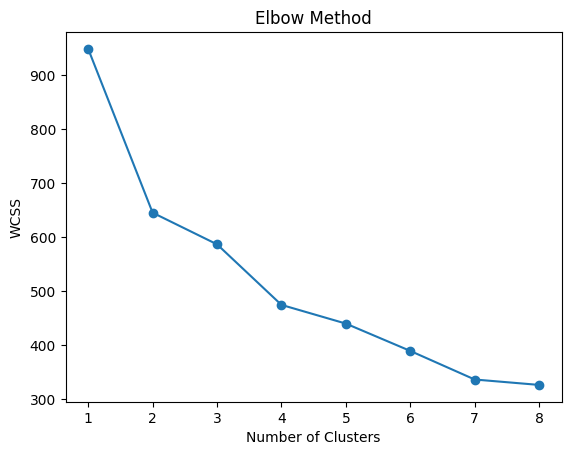

In [30]:
##ELBOW GRAPH:-
plt.plot(range(1,9),wcss,marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

## **SHILHOUETTE METHOD:-**

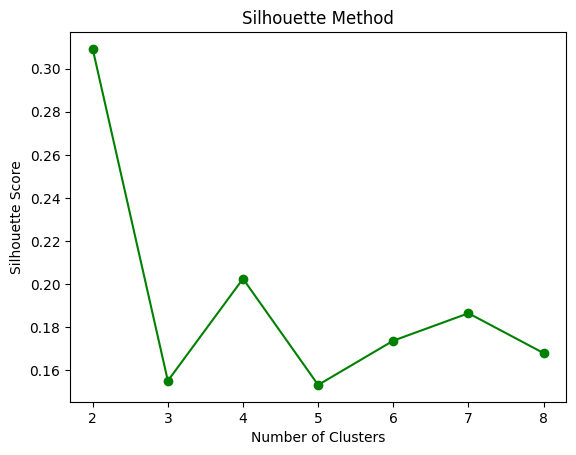

In [31]:
shc=[]
for i in range(2,9): # Start the loop from 2 instead of 1
  kmeans=KMeans(n_clusters=i,max_iter=150,random_state=42)
  score=silhouette_score(df_scaled,kmeans.fit_predict(df_scaled))
  shc.append(score)
plt.plot(range(2,9),shc,marker='o',color='green') # Adjust the range here as well
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

In [33]:
kmean=KMeans(n_clusters=4,max_iter=150,random_state=42)
kmean.fit(df_scaled)

KMeans(max_iter=150, n_clusters=4, random_state=42)

In [34]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 6, 2, 6, 6, 6, 4, 0, 5, 0, 5, 6, 6, 5, 5, 6,
       5, 6, 4, 7, 6, 4, 5, 0, 5, 5, 5, 5, 7, 5, 1, 1, 0, 7, 1, 5, 7, 1,
       5, 5, 3, 1, 1, 7, 4, 3, 1, 3, 1, 1, 3, 3, 3, 7, 1, 3, 3, 7, 3, 7,
       1, 3, 3, 1, 3, 1, 1, 1, 1, 3, 3, 3, 5], dtype=int32)

In [38]:
df['clusterid']=kmeans.labels_
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,exp,clusterid
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23,2
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,2
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,2
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,2
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,2


## **3d plotting:**

In [39]:
import plotly.express as px
fig = px.scatter_3d(df,x="Runs",y="Ave",z='SR',color = "clusterid",hover_name="Player",title="3d scatter plot")
fig.update_layout(scene = dict(xaxis_title ="Runs",yaxis_title ="Average",zaxis_title='strike rate'),width =800,height = 600)
fig.show()